In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('mental_health_dataset.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Unnamed: 0,Description,Mental_State
0,0,I'm sorry about this post. It's gonna be a who...,Addiction
1,1,Been getting super high off high amounts of th...,Addiction
2,2,My brothers been shooting heroin/meth for the ...,Addiction
3,3,I rlly need an opinion cuz idk bout this stuff...,Addiction
4,4,Ive smoked weed since 8th grade in middle scho...,Addiction


In [4]:
df.tail()

,Unnamed: 0,Description,Mental_State
11736,11736,possible have satpathy ask question the questi...,neutral
11737,11737,god that was thorough,neutral
11738,11738,thread and meat kaun jat bhai,neutral
11739,11739,not touch food with your left hand left handed,neutral
11740,11740,they say because they care for,neutral


In [5]:
df.dropna(inplace=True)

In [6]:
df["Mental_State"].value_counts()

Anxiety                   1024
Bipolar                   1024
Borderline Personality    1024
Depression                1024
Schizophernia             1024
Suidal Thought            1024
neutral                   1024
Alcoholism                 999
Addiction                  998
Aspergers                  799
SelfHarm                   746
Name: Mental_State, dtype: int64

In [7]:
text = df['Description'].values.tolist()
label = df['Mental_State'].tolist()

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text , label, test_size=0.2, random_state=42)

In [9]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)


In [10]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 144
	95percentile : 432
	99percentile : 743


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 151
	95percentile : 460
	99percentile : 846


In [11]:
model = t.get_classifier()

In [12]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

In [13]:
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1428/1428 [==============================] - 17033s 12s/step - loss: 1.9293 - accuracy: 0.3627 - val_loss: 1.1477 - val_accuracy: 0.6522
Epoch 2/10
1428/1428 [==============================] - 17100s 12s/step - loss: 0.9987 - accuracy: 0.7063 - val_loss: 0.8186 - val_accuracy: 0.7367
Epoch 3/10
1428/1428 [==============================] - 17108s 12s/step - loss: 0.7160 - accuracy: 0.7764 - val_loss: 0.8519 - val_accuracy: 0.7428
Epoch 4/10
1428/1428 [==============================] - 17232s 12s/step - loss: 0.6001 - accuracy: 0.8080 - val_loss: 0.7592 - val_accuracy: 0.7530
Epoch 5/10
1428/1428 [==============================] - 17799s 12s/step - loss: 0.5088 - accuracy: 0.8358 - val_loss: 0.6833 - val_accuracy: 0.7871
Epoch 6/10
1428/1428 [==============================] - 17367s 12s/step - loss: 0.3946 - accuracy: 0.8773 - val_loss: 0.7226 - val_accuracy: 0.7965
Epoch 7/10
1428/1428 [===========================

In [14]:
learner.validate(class_names=t.get_classes()) 

                        precision    recall  f1-score   support

             Addiction       0.86      0.87      0.86       205
            Alcoholism       0.87      0.91      0.89       196
               Anxiety       0.76      0.76      0.76       189
             Aspergers       0.81      0.82      0.81       153
               Bipolar       0.88      0.76      0.82       220
Borderline Personality       0.77      0.76      0.77       215
            Depression       0.57      0.65      0.61       206
         Schizophernia       0.83      0.85      0.84       197
              SelfHarm       0.93      0.83      0.88       159
        Suidal Thought       0.67      0.68      0.67       197
               neutral       0.98      0.96      0.97       205

              accuracy                           0.80      2142
             macro avg       0.81      0.80      0.81      2142
          weighted avg       0.81      0.80      0.80      2142



array([[178,  14,   0,   6,   0,   1,   3,   1,   1,   1,   0],
       [ 12, 178,   2,   1,   1,   1,   0,   0,   1,   0,   0],
       [  1,   3, 144,   4,   5,  11,  13,   3,   1,   3,   1],
       [  4,   3,   5, 125,   1,   6,   3,   4,   1,   1,   0],
       [  0,   1,   8,   0, 168,   7,  14,  15,   0,   7,   0],
       [  3,   4,   8,   6,   5, 164,  15,   1,   0,   9,   0],
       [  4,   2,   7,   4,   4,  10, 133,   4,   0,  38,   0],
       [  0,   0,   8,   1,   6,   6,   3, 168,   0,   4,   1],
       [  4,   0,   1,   7,   0,   2,   4,   2, 132,   4,   3],
       [  2,   0,   6,   0,   2,   5,  43,   2,   3, 134,   0],
       [  0,   0,   1,   0,   0,   0,   1,   3,   3,   0, 197]],
      dtype=int64)

In [15]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

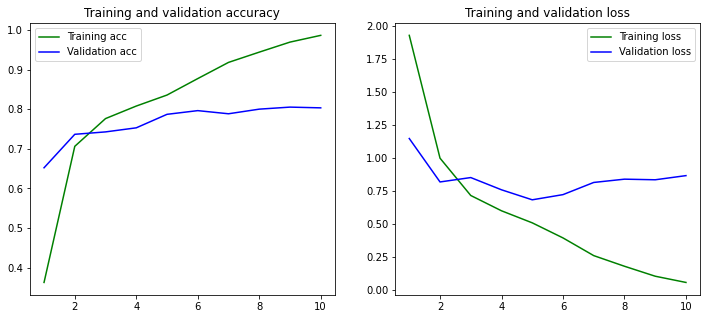

In [16]:
PlotGraph(history)

In [17]:
predictor=ktrain.get_predictor(learner.model, preproc=t)

In [22]:
predictor.predict(" I'm sorry about this post. It's gonna be a whole lot of hand wringing and mental masturbation. But I never seem to be able to process this in a meaningful way - and it makes attending NA and AA meetings a real pain. I don't seem to have the same kind of sickness that everyone else is describing - I'm having trouble relating to anyone at all there. I don't know what it's like for normal functional people, nor do I know what it's like for people who taste 1% beer and come to next month in jail after charging a rhino to a military convoy dressed in wehrmact univorm. Instead of this all-encompassing disease people speak of in groups it's like a slight poly-addiction as parts of the maladaptive patterns I've learned due to ADHD - and the cravings themselves are way lessened due to starting on strattera")

'Alcoholism'

In [23]:
predictor.explain(" I'm sorry about this post. It's gonna be a whole lot of hand wringing and mental masturbation. But I never seem to be able to process this in a meaningful way - and it makes attending NA and AA meetings a real pain. I don't seem to have the same kind of sickness that everyone else is describing - I'm having trouble relating to anyone at all there. I don't know what it's like for normal functional people, nor do I know what it's like for people who taste 1% beer and come to next month in jail after charging a rhino to a military convoy dressed in wehrmact univorm. Instead of this all-encompassing disease people speak of in groups it's like a slight poly-addiction as parts of the maladaptive patterns I've learned due to ADHD - and the cravings themselves are way lessened due to starting on strattera ")